In [116]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [9]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint= False).reshape(-1,1)

In [19]:
tree_reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
lin_reg = LinearRegression().fit(X,y)

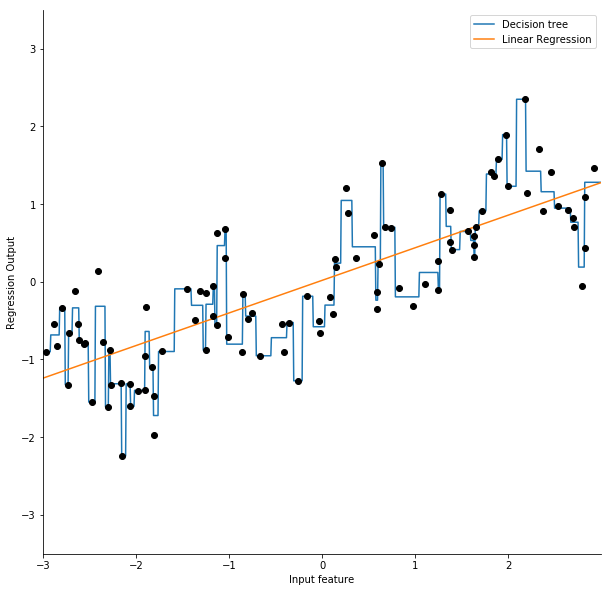

In [20]:
fig, ax = plt.subplots()

fig.set_size_inches((10, 10))

ax.plot(line, tree_reg.predict(line), label = "Decision tree")
ax.plot(line, lin_reg.predict(line), label = "Linear Regression")
ax.plot(X[:, 0], y, 'o', c='k')
ax.margins(0)
ax.set_ylim((line.min() - 0.5 , line.max() + 0.5))
ax.set_ylabel("Regression Output")
ax.set_xlabel("Input feature")

ax.legend(loc="best")


for spn in ['top', 'right']:
    ax.spines[spn].set_color('none')

## Let's Make Bins

### Large Continuous Data Set to binned Data 

So that you can increase the prediction accuracy with Linear based machine learning model

In [22]:
bins = np.linspace(-3,3,11)
which_bin = np.digitize(X, bins=bins)

In [24]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)

In [28]:
print(X_binned)
print(X_binned.shape)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [30]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

In [34]:
line_reg = LinearRegression().fit(X_binned, y)
tree_reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)

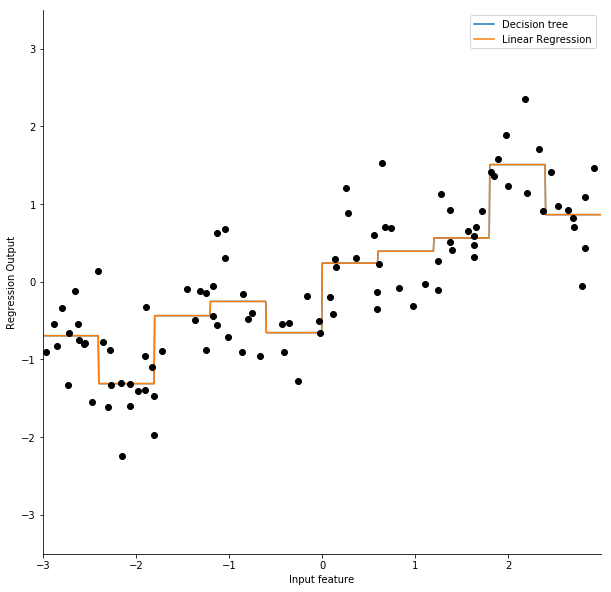

In [35]:
fig, ax = plt.subplots()

fig.set_size_inches((10, 10))

ax.plot(line, tree_reg.predict(line_binned), label = "Decision tree")
ax.plot(line, line_reg.predict(line_binned), label = "Linear Regression")
ax.plot(X[:, 0], y, 'o', c='k')
ax.margins(0)
ax.set_ylim((line.min() - 0.5 , line.max() + 0.5))
ax.set_ylabel("Regression Output")
ax.set_xlabel("Input feature")

ax.legend(loc="best")


for spn in ['top', 'right']:
    ax.spines[spn].set_color('none')

In [37]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


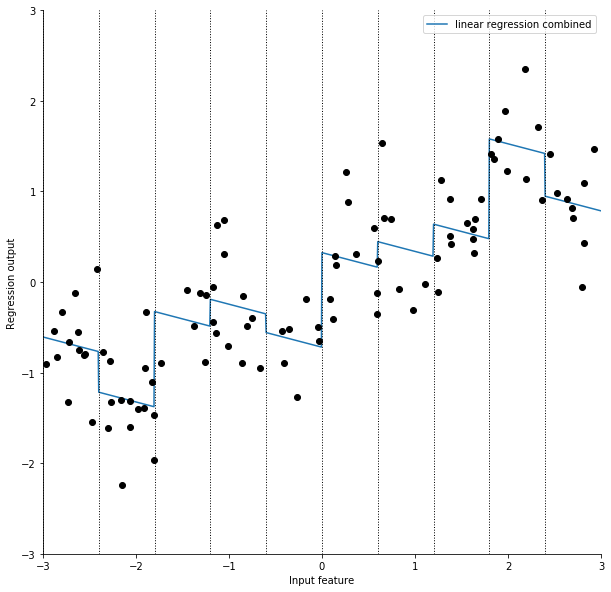

In [43]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])

fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax.plot(line, reg.predict(line_combined), label = "linear regression combined")

for bn in bins:
    ax.plot([bn, bn], [-3,3], ":", c='k', linewidth=1)

ax.legend(loc="best")
ax.set_ylabel("Regression output")
ax.set_xlabel("Input feature")
ax.plot(X[:, 0],y,'o', c='k')
ax.margins(0)

for spn in ['top', 'right']:
    ax.spines[spn].set_color('none')

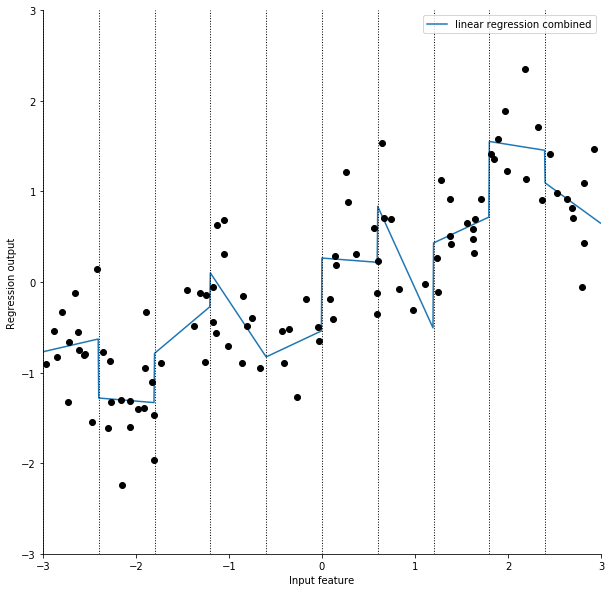

In [46]:
X_product = np.hstack([X_binned, X * X_binned])
reg = LinearRegression().fit(X_product,y)
line_product = np.hstack([line_binned, line*line_binned])

fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax.plot(line, reg.predict(line_product), label = "linear regression combined")

for bn in bins:
    ax.plot([bn, bn], [-3,3], ":", c='k', linewidth=1)

ax.legend(loc="best")
ax.set_ylabel("Regression output")
ax.set_xlabel("Input feature")
ax.plot(X[:, 0],y,'o', c='k')
ax.margins(0)

for spn in ['top', 'right']:
    ax.spines[spn].set_color('none')

## Polynomial Feature

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [55]:
print("X_poly.shape:{}".format(X_poly.shape))

X_poly.shape:(100, 10)


In [74]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [76]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

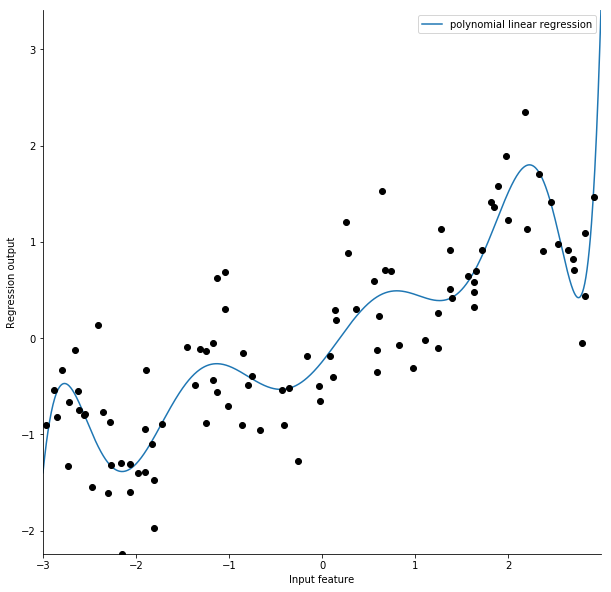

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))

ax.plot(line, reg.predict(line_poly), label = "polynomial linear regression")

ax.legend(loc="best")
ax.set_ylabel("Regression output")
ax.set_xlabel("Input feature")
ax.plot(X[:, 0],y,'o', c='k')
ax.margins(0)

for spn in ['top', 'right']:
    ax.spines[spn].set_color('none')

## Polynomial Feature w/o Kernel SVM model

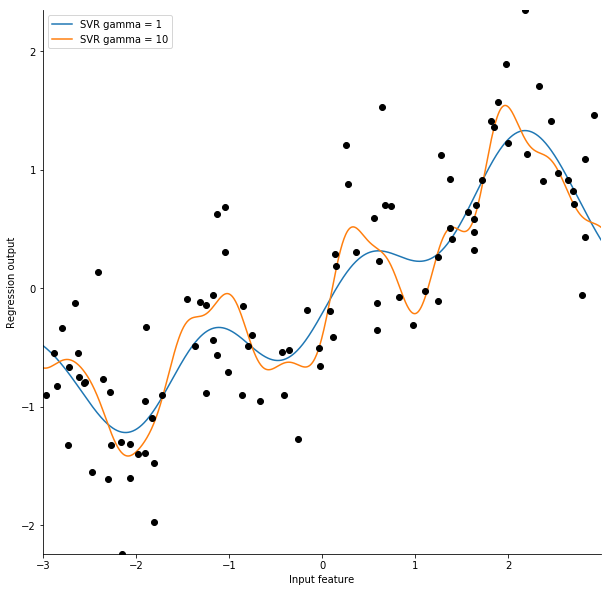

In [79]:
from sklearn.svm import SVR

fig, ax = plt.subplots()
fig.set_size_inches((10, 10))

for gamma in [1, 10]:
    
    svr = SVR(gamma=gamma).fit(X,y)
    ax.plot(line, svr.predict(line), label = 'SVR gamma = {}'.format(gamma))
    
ax.legend(loc="best")
ax.set_ylabel("Regression output")
ax.set_xlabel("Input feature")
ax.plot(X[:, 0],y,'o', c='k')
ax.margins(0)

for spn in ['top', 'right']:
    ax.spines[spn].set_color('none')    

## Apply it to Boston Dataset

In [81]:
## Package Loading

from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                   random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [95]:
## With Ridge

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interaction: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score without interaction: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interaction: 0.621
Score without interaction: 0.753


In [98]:
## With Lasso

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100).fit(X_train_scaled, y_train)
print("Score without interaction: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators = 100).fit(X_train_poly, y_train)
print("Score without interaction: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interaction: 0.794
Score without interaction: 0.771


In [99]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

print("Number of feature appearance:\n{}".format(np.bincount(X[:,0])))

Number of feature appearance:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


## Univariate Nonlinear Transformation

### The issue: What if there is nonleaner relationship between the feature and the target?

Text(0.5,0,'Value')

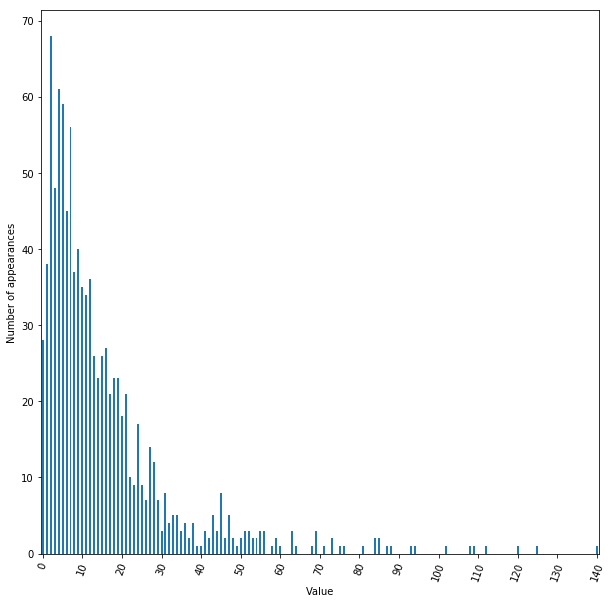

In [149]:
bins = np.bincount(X[:, 0])

fig, ax = plt.subplots()
fig.set_size_inches((10, 10))

bin_dt = pd.DataFrame([np.arange(0,len(bins)), bins])\
         .T\
         .set_index(0)

bin_dt.plot(ax = ax,kind = 'bar', legend=None)

ax.set_xticks(range(0,len(bins), 10))
ax.set_xticklabels(range(0,len(bins), 10), rotation = 70)
ax.set_ylabel("Number of appearances")
ax.set_xlabel("Value")

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [154]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

### Using Logged Data

Text(0.5,0,'Value')

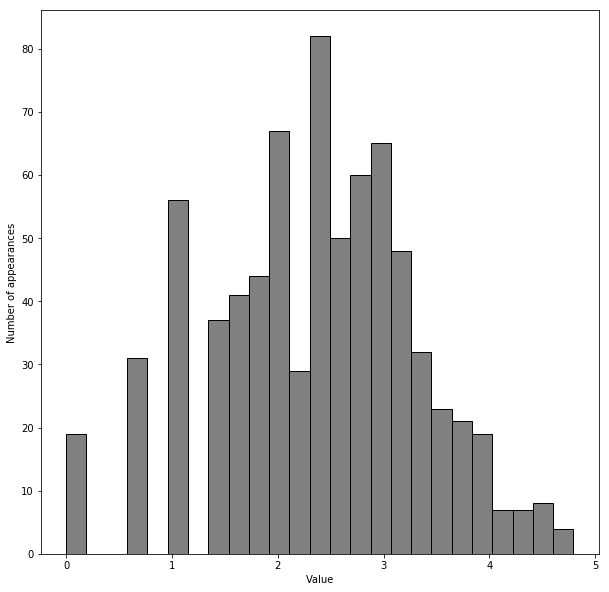

In [158]:
fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax.hist(X_train_log[:, 0], bins=25, color = 'gray', edgecolor='black')
ax.set_ylabel("Number of appearances")
ax.set_xlabel("Value")

In [162]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


## Univeraiate Statistics

### Feature Selection with Univariate Statistics.

Only informative varaible can be remained

In [163]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile

In [167]:
cancer = load_breast_cancer()

# get deterministic random numbers for reprouducing result

rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))

# Add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target,
                                                   random_state = 0,
                                                   test_size = .5)
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x0000020F67ED89D8>)

In [168]:
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


In [170]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text yticklabel objects>)

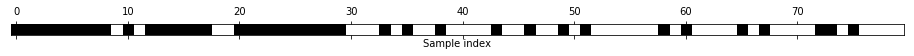

In [172]:
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel("Sample index")
plt.yticks(())

### Logistic Regression after selecting features

In [173]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


## Model-Based Feature Selection

### Select features with SelectFromModel transformer

In [174]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [178]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), 
                        threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5,0,'Sample index')

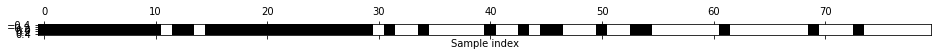

In [182]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel("Sample index")


In [184]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


## Iterative Feature Selection

In [186]:
from sklearn.feature_selection import RFE

([], <a list of 0 Text yticklabel objects>)

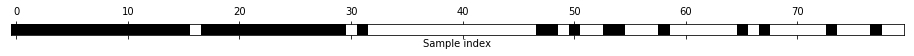

In [187]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()

plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Sample index')
plt.yticks(())

In [189]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


## Feature Selection with City Bike Data

In [214]:
citibike = mglearn.datasets.load_citibike()
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


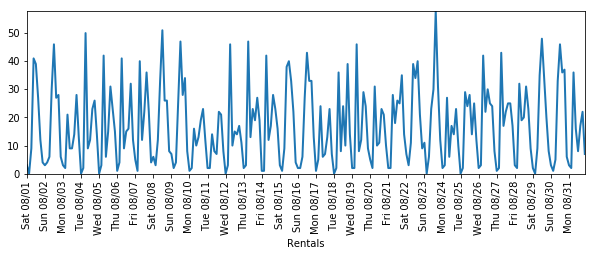

In [224]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 3)

xticks = pd.date_range(start=citibike.index.min(), 
                       end =citibike.index.max(), freq = 'D')

ax.plot(citibike, lw = 2)
ax.set_xlabel('Date')
ax.set_xlabel('Rentals')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime("%a %m/%d"), rotation = 90)

ax.margins(0)

In [235]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

n_train = 184

def eval_on_features(features, target, regressor):
    
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    
    print("Test-set R^2: {:.2f}". format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(10, 3)
    
    ax.set_xticks(range(0, len(X), 8))
    ax.set_xticklabels(xticks.strftime("%a %m-%d"), rotation = 90)
    
    ax.plot(range(n_train), y_train, label = "train")
    ax.plot(range(n_train, len(y_test) + n_train), y_test, '-', label = "test")
    ax.plot(range(n_train), y_pred_train, '--', label = "prediction train")
    
    ax.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
           label="prediction test")
    ax.legend(loc=(1.01, 0))
    ax.margins(0)
    ax.set_xlabel("Date")
    ax.set_ylabel("Rentals")
    

Test-set R^2: -0.04


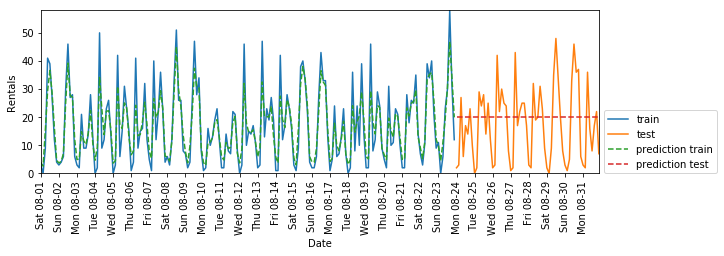

In [236]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X,y,regressor)

Test-set R^2: 0.60


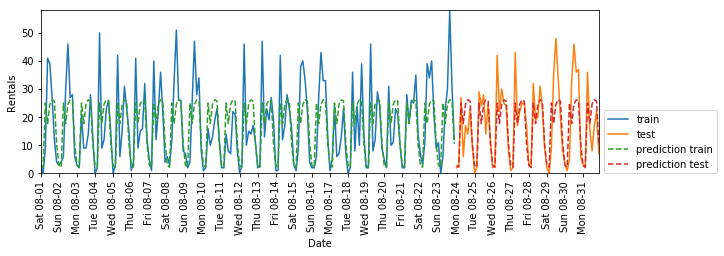

In [237]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour,y,regressor)

## Random Forest with hstacked hour/week

Test-set R^2: 0.84


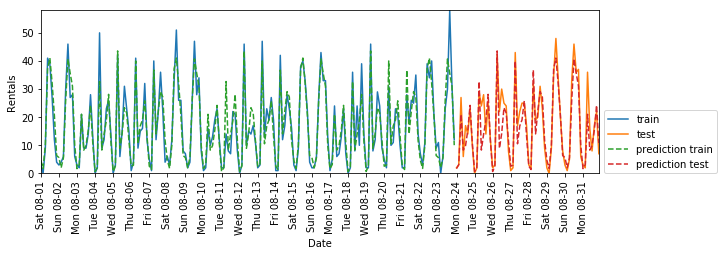

In [238]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                        citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week,y,regressor)

Test-set R^2: 0.13


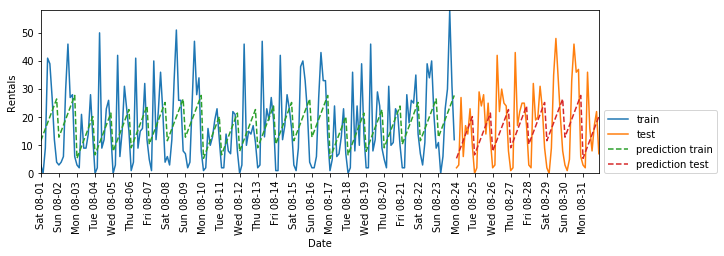

In [239]:
eval_on_features(X_hour_week,y,LinearRegression())

## Ridge with OneHotEncoder

Test-set R^2: 0.62


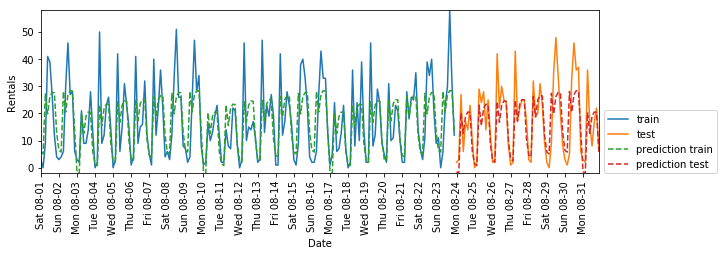

In [240]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


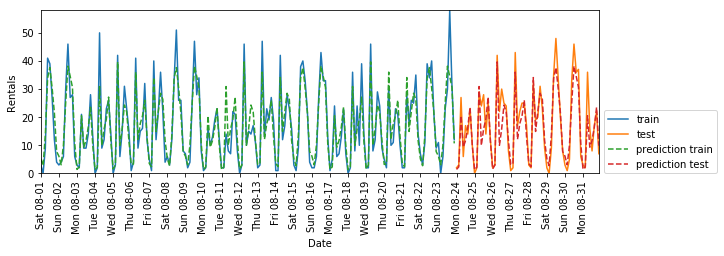

In [241]:
poly_transformer = PolynomialFeatures(degree =2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

Text(0,0.5,'Feature magnitude')

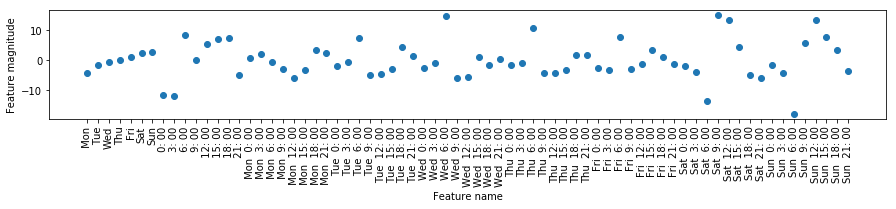

In [243]:
hour = ["% 02d: 00" % i for i in range( 0, 24, 3)] 
day = [" Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] 
features = day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ !=0]
coef_nonzero = lr.coef_[lr.coef_ !=0]

plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero,rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")